In [886]:
import pandas as pd
import numpy as np




# ----- HELPER FUNCTIONS ----

def _create_df_dummy_states(df, state_col_name):
    return pd.get_dummies(df[state_col_name], prefix='ST:')

def _drop_cols(df, col_names):
    for col in col_names:
        df = df.drop(col, axis = 1)
    return df


## ------ CLEANING FEATURES ----- #

def clean_reformat_features(filepath):

    df = pd.read_csv(filepath)

    #state dummies
    states = _create_df_dummy_states(df, "State_master")
    #if state dummies missing a state, add the column with all zeros
    all_states = ['ST:_Alabama', 'ST:_Alaska', 'ST:_Arizona', 'ST:_Arkansas',
       'ST:_California', 'ST:_Colorado', 'ST:_Connecticut', 'ST:_Delaware',
       'ST:_District of Columbia', 'ST:_Florida', 'ST:_Georgia', 'ST:_Idaho',
       'ST:_Illinois', 'ST:_Indiana', 'ST:_Iowa', 'ST:_Kansas', 'ST:_Kentucky',
       'ST:_Louisiana', 'ST:_Maine', 'ST:_Maryland', 'ST:_Massachusetts',
       'ST:_Michigan', 'ST:_Minnesota', 'ST:_Mississippi', 'ST:_Missouri',
       'ST:_Montana', 'ST:_Nebraska', 'ST:_Nevada', 'ST:_New Hampshire',
       'ST:_New Jersey', 'ST:_New Mexico', 'ST:_New York',
       'ST:_North Carolina', 'ST:_North Dakota', 'ST:_Ohio', 'ST:_Oklahoma',
       'ST:_Oregon', 'ST:_Pennsylvania', 'ST:_Rhode Island',
       'ST:_South Carolina', 'ST:_South Dakota', 'ST:_Tennessee', 'ST:_Texas',
       'ST:_Utah', 'ST:_Vermont', 'ST:_Virginia', 'ST:_Washington',
       'ST:_West Virginia', 'ST:_Wisconsin', 'ST:_Wyoming', 'ST:_Hawaii']
    for state_col in all_states:
         if state_col not in states.columns:
             states[state_col] = [0] * states.shape[0]

    df = df.join(states)
    df = _drop_cols(df, ['State_master', 'ST:_Hawaii'])



    #reduce ages into fewer Grps(otherwise high correlation)
    df['Age:0-14'] = df['AgeGrp01:0-4:2010'] +  df['AgeGrp02:5-9:2010'] + df['AgeGrp03:10-14:2010']
    df['Age:15-24'] = df['AgeGrp04:15-19:2010'] +  df['AgeGrp05:20-24:2010']
    df['Age:25-44'] = df['AgeGrp06:25-29:2010'] +  df['AgeGrp07:30-34:2010'] + df['AgeGrp08:35-39:2010'] +  df['AgeGrp09:40-44:2010']
    df['Age:45+'] = df['AgeGrp10:45-49:2010'] + df['AgeGrp11:50-54:2010'] + df['AgeGrp12:55-59:2010'] + df['AgeGrp13:60-64:2010'] + df['AgeGrp14:65-69:2010'] + df['AgeGrp15:70-74:2010'] + df['AgeGrp16:75-79:2010'] + df['AgeGrp17:80-84:2010'] + df['AgeGrp18:85+:2010']

    dropped_ages = ['AgeGrp01:0-4:2010', 'AgeGrp02:5-9:2010', 'AgeGrp03:10-14:2010',
       'AgeGrp04:15-19:2010', 'AgeGrp05:20-24:2010',
       'AgeGrp06:25-29:2010', 'AgeGrp07:30-34:2010',
       'AgeGrp08:35-39:2010', 'AgeGrp09:40-44:2010',
       'AgeGrp10:45-49:2010', 'AgeGrp11:50-54:2010',
       'AgeGrp12:55-59:2010', 'AgeGrp13:60-64:2010',
       'AgeGrp14:65-69:2010', 'AgeGrp15:70-74:2010',
       'AgeGrp16:75-79:2010', 'AgeGrp17:80-84:2010', 'AgeGrp18:85+:2010']

    df = _drop_cols(df, dropped_ages)

    #add % male feature
    df["Male_pct_2010"] =  (df["TOT_MALE"] / df["TOT_POP"])*100
    df = _drop_cols(df, ['TOT_MALE'])

    #create rate change features for diabetes and obesity, remove non-needed
    df['DB:2009-2010:Rate_Change'] = (df["DB:2010:percent"] - df['DB:2009:percent']) / df['DB:2009:percent']
    df['OB:2009-2010:Rate_Change'] = (df["OB:2010:percent"] - df['OB:2009:percent']) / df['OB:2009:percent']
    df['LI:2009-2010:Rate_Change'] = (df["LI:2010:percent"] - df['LI:2009:percent']) / df['LI:2009:percent']

    df = _drop_cols(df, ['DB:2009:percent', 'OB:2009:percent', 'LI:2009:percent'])

    #reformat census columns
    # --> combine male.female into one
    census_col_prefixes = ['BAC', 'IAC', 'AAC', 'NAC', 'H']
    for race in census_col_prefixes:
        df['CEN:2010:' + race] = (df[race + '_MALE'] + df[race + '_FEMALE']) / df["TOT_POP"]
        df = _drop_cols(df, [race + '_MALE', race + '_FEMALE'])
    # --> remove columns no longer needed (WAC was heavily correlated with BAC, BAC performed better)
    df = _drop_cols(df, ['TOT_POP', 'WAC_MALE', 'WAC_FEMALE'])

    #fill in missing values *only 5 in training and test set, across differnet rows
    df.fillna(df.mean(), inplace = True)

    return df



if __name__ == '__main__':
    filepath_X = '../data/X_train.csv'
    X_train = clean_reformat_features(filepath_X)
    filepath_y = '../data/y_train.csv'
    y_train = pd.read_csv(filepath_y)

'''



def scale_data()
scalar = StandardScaler()


#SCALE!

FOR MODEL FIT / TRNAFORMS --> MUST SCALE DATA THERE!!!!! (BC MUST BE FIT TO TRIAN)

'''


'\n\n\n\ndef scale_data()\nscalar = StandardScaler()\n\n\n#SCALE!\n\nFOR MODEL FIT / TRNAFORMS --> MUST SCALE DATA THERE!!!!! (BC MUST BE FIT TO TRIAN)\n\n'

In [887]:
filepath_Xtest = '../data/X_test.csv'
X_test = clean_reformat_features(filepath_Xtest)
filepath_ytest = '../data/y_test.csv'
y_test = pd.read_csv(filepath_ytest)

In [15]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [55]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error 


# 0 Average

In [52]:
avg = y_train.mean()
avg

y_train    5.376988
dtype: float64

In [53]:
y_pred_avg = np.array([avg] * X_train.shape[0])
y_pred_avg

array([[5.3769882],
       [5.3769882],
       [5.3769882],
       ...,
       [5.3769882],
       [5.3769882],
       [5.3769882]])

In [56]:
avg_model_mse = mean_squared_error(y_train, y_pred_avg)
avg_model_mse

140.22171307415687

# 1 SCALE DATA!!

In [18]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

# RIDGE: GRID SEARCH!

In [27]:
ridge = Ridge(random_state=50)

In [29]:
alpha = [.01, .05, .1, .25, .5, 1.0, 1.5, 3.0, 5.0, 8.0, 10.0, 20.0, 30.0, 50.0]  #larger values stronger regulation
solver = ['svd', 'cholesky', 'lsqr','sag', 'saga']
max_iter = [None, 200, 500, 1000, 2000, 5000]

random_grid = {'alpha': alpha,
               'solver': solver, 
              "max_iter" : max_iter}
print(random_grid)

{'alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 1.0, 1.5, 3.0, 5.0, 8.0, 10.0, 20.0, 30.0, 50.0], 'solver': ['svd', 'cholesky', 'lsqr', 'sag', 'saga'], 'max_iter': [None, 200, 500, 1000, 2000, 5000]}


In [30]:
ridgegrid = GridSearchCV(ridge, param_grid=random_grid, cv=3, scoring = 'neg_mean_squared_error')
ridgegrid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=50, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 1.0, 1.5, 3.0, 5.0, 8.0, 10.0, 20.0, 30.0, 50.0], 'solver': ['svd', 'cholesky', 'lsqr', 'sag', 'saga'], 'max_iter': [None, 200, 500, 1000, 2000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [31]:
ridgegrid.best_params_

{'alpha': 10.0, 'max_iter': None, 'solver': 'cholesky'}

In [32]:
ridgegrid.best_score_

-101.70832375844401

In [37]:
ridgebest = Ridge(alpha =  10.0, max_iter = None, solver = 'cholesky')


In [116]:
score = cross_val_score(ridgebest, X_train_scaled, y_train, cv = 2, scoring = 'neg_mean_squared_error' )
print(score.mean())
score

-103.5202556876909


array([-102.09715666, -104.94335472])

In [111]:
ridgebest.fit(X_train_scaled, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [113]:
(abs(ridgebest.coef_) > 1.5).sum()

11

In [163]:
y_pred = ridgebest.predict(X_test_scaled)

In [164]:
mean_squared_error(y_test, y_pred)

136.76797347251218

# LASSO: GRID SEARCH!

In [42]:
lasso = Lasso(random_state=50)

In [45]:
alpha = [.01, .025, .05, .1, .25, .5, 1, 1.5, 2, 3, 5, 10, 20, 30, 50]
max_iter = [200, 500, 1000, 2000, 5000]

random_grid = {'alpha': alpha,
               'max_iter': max_iter}
print(random_grid)

{'alpha': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5, 10, 20, 30, 50], 'max_iter': [200, 500, 1000, 2000, 5000]}


In [47]:
lassogrid = GridSearchCV(lasso, param_grid=random_grid, cv=3, scoring = 'neg_mean_squared_error')
lassogrid.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=50,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5, 10, 20, 30, 50], 'max_iter': [200, 500, 1000, 2000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
lassogrid.best_params_

{'alpha': 0.05, 'max_iter': 200}

In [51]:
lassogrid.best_score_

-101.28416419401209

In [190]:
lassobest = Lasso(alpha =  .5, max_iter = 1000)


In [191]:
score = cross_val_score(lassobest, X_train_scaled, y_train, cv = 2, scoring = 'neg_mean_squared_error' )
print(score.mean())
score

-111.75042633643307


array([-106.59523631, -116.90561636])

In [195]:
lassobest.fit(X_train_scaled, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
lassobest.coef_

array([-3.64450749e+00,  1.55665931e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.42987506e+00,  0.00000000e+00,  1.72281642e-01,
       -6.03379698e-01, -0.00000000e+00,  4.38763941e-01, -6.34028273e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.35821004e-01,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -4.01538510e-01,  0.00000000e+00,  1.49867099e-01,
        7.28662456e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.99316458e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.79902870e-02,  0.00000000e+00, -0.00000000e+00,
        3.14980997e-01,  0.00000000e+00,  6.45190145e-02,  0.00000000e+00,
        0.00000000e+00,  1.24980436e-01, -0.00000000e+00,  5.47345306e-01,
       -1.16139977e+00, -

In [202]:
(abs(lassobest.coef_) > .5).sum()

10

In [203]:
X_train.columns[abs(lassobest.coef_) > .5]

Index(['DB:2010:percent', 'UnemploymentRate:2010', 'LI:2010:percent',
       'Alcohol:Any:2010', 'ST:_Alaska', 'ST:_Iowa', 'ST:_Tennessee',
       'ST:_Texas', 'DB:2009-2010:Rate_Change', 'CEN:2010:H'],
      dtype='object')

In [106]:
lassobest.coef_[abs(lassobest.coef_) > 1]

array([-7.92489904,  2.26128023,  1.84931197,  1.44797427, -2.17311335,
       -1.40484532, -1.18070471, -1.00593322,  1.00750512, -1.09419104,
       -1.87679703,  1.34204478, -1.20593757])

In [119]:
for i in zip(lassobest.coef_[abs(lassobest.coef_) > 1], X_train.columns[abs(lassobest.coef_) > 1]):
    print (i)

(-7.924899040205686, 'DB:2010:percent')
(2.2612802299019394, 'UnemploymentRate:2010')
(1.8493119680463288, 'LI:2010:percent')
(1.4479742705915162, 'Rural_percent_2010')
(-2.1731133546859183, 'Alcohol:Any:2010')
(-1.4048453154647444, 'ST:_Alaska')
(-1.1807047114053997, 'ST:_Colorado')
(-1.005933217754181, 'ST:_Idaho')
(1.007505119508163, 'ST:_Iowa')
(-1.0941910351551556, 'ST:_Texas')
(-1.8767970321165168, 'DB:2009-2010:Rate_Change')
(1.3420447768683614, 'CEN:2010:BAC')
(-1.205937572703344, 'CEN:2010:H')


In [159]:
X_test_scaled = scalar.transform(X_test)

In [836]:
y_pred = lassobest.predict(X_test_scaled)

In [194]:
mean_squared_error(y_test, y_pred)

125.3111334211078

In [143]:
X_test.shape

(943, 73)

In [127]:
X_train.shape

(2199, 73)

Index(['DB:2010:percent', 'UnemploymentRate:2010', 'PCT_LACCESS_POP10',
       'FFRPTH09', 'Poverty_Rate_2010', 'LI:2010:percent', 'OB:2010:percent',
       'Rural_percent_2010', 'Alcohol:Any:2010', 'Alcohol:Heavy:2010',
       'ST:_Alabama', 'ST:_Alaska', 'ST:_Arizona', 'ST:_Arkansas',
       'ST:_California', 'ST:_Colorado', 'ST:_Connecticut', 'ST:_Florida',
       'ST:_Georgia', 'ST:_Idaho', 'ST:_Illinois', 'ST:_Indiana', 'ST:_Iowa',
       'ST:_Kansas', 'ST:_Kentucky', 'ST:_Louisiana', 'ST:_Maine',
       'ST:_Maryland', 'ST:_Massachusetts', 'ST:_Michigan', 'ST:_Minnesota',
       'ST:_Mississippi', 'ST:_Missouri', 'ST:_Montana', 'ST:_Nebraska',
       'ST:_Nevada', 'ST:_New Hampshire', 'ST:_New Jersey', 'ST:_New Mexico',
       'ST:_New York', 'ST:_North Carolina', 'ST:_North Dakota', 'ST:_Ohio',
       'ST:_Oklahoma', 'ST:_Oregon', 'ST:_Pennsylvania', 'ST:_Rhode Island',
       'ST:_South Carolina', 'ST:_South Dakota', 'ST:_Tennessee', 'ST:_Texas',
       'ST:_Utah', 'ST:_Vermont

In [137]:
X_train.columns[X_train.columns.str.startswith("ST:")]


Index(['ST:_Alabama', 'ST:_Alaska', 'ST:_Arizona', 'ST:_Arkansas',
       'ST:_California', 'ST:_Colorado', 'ST:_Connecticut', 'ST:_Delaware',
       'ST:_District of Columbia', 'ST:_Florida', 'ST:_Georgia', 'ST:_Idaho',
       'ST:_Illinois', 'ST:_Indiana', 'ST:_Iowa', 'ST:_Kansas', 'ST:_Kentucky',
       'ST:_Louisiana', 'ST:_Maine', 'ST:_Maryland', 'ST:_Massachusetts',
       'ST:_Michigan', 'ST:_Minnesota', 'ST:_Mississippi', 'ST:_Missouri',
       'ST:_Montana', 'ST:_Nebraska', 'ST:_Nevada', 'ST:_New Hampshire',
       'ST:_New Jersey', 'ST:_New Mexico', 'ST:_New York',
       'ST:_North Carolina', 'ST:_North Dakota', 'ST:_Ohio', 'ST:_Oklahoma',
       'ST:_Oregon', 'ST:_Pennsylvania', 'ST:_Rhode Island',
       'ST:_South Carolina', 'ST:_South Dakota', 'ST:_Tennessee', 'ST:_Texas',
       'ST:_Utah', 'ST:_Vermont', 'ST:_Virginia', 'ST:_Washington',
       'ST:_West Virginia', 'ST:_Wisconsin', 'ST:_Wyoming'],
      dtype='object')

In [165]:
# FINAL: RANDOM FOREST

In [168]:
from sklearn.ensemble import RandomForestRegressor


In [489]:
rfbest = RandomForestRegressor(max_depth = 20, min_samples_leaf = 5, n_estimators = 500, oob_score = True)

In [490]:
rfbest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [491]:
y_pred = rfbest.oob_prediction_
mean_squared_error(y_pred, y_train)

111.2491430159424

In [492]:
#with test set

In [493]:
y_pred = rfbest.predict(X_test)
mean_squared_error(y_pred, y_test)

122.54953768082021

# RANDOME FORES _ RANDO NOISE!!!


In [875]:
rfbestNOISE = RandomForestRegressor(max_depth = 20, min_samples_leaf = 5, n_estimators = 500, oob_score = True)

In [876]:
X_trainNOISE = X_train.copy()

In [892]:
X_trainNOISE["noise"] = np.random.random(X_train.shape[0])

In [893]:
X_trainNOISE.head()

,DB:2010:percent,UnemploymentRate:2010,PCT_LACCESS_POP10,FFRPTH09,Poverty_Rate_2010,LI:2010:percent,OB:2010:percent,Rural_percent_2010,Alcohol:Any:2010,Alcohol:Heavy:2010,...,Male_pct_2010,DB:2009-2010:Rate_Change,OB:2009-2010:Rate_Change,LI:2009-2010:Rate_Change,CEN:2010:BAC,CEN:2010:IAC,CEN:2010:AAC,CEN:2010:NAC,CEN:2010:H,noise
0,8.6,6.9,31.890332,0.446628,14.020755,30.8,24.0,100.000000,60.5,11.7,...,49.845747,0.000000,0.095890,0.080702,0.004407,0.025342,0.003085,0.000661,0.026003,0.929342
1,9.0,9.0,26.312732,1.640379,17.169601,24.5,32.3,1.165280,51.6,9.3,...,45.886519,-0.090909,0.106164,-0.031621,0.256279,0.016841,0.040682,0.002388,0.107346,0.052838
2,11.8,8.8,0.000000,0.456371,10.167144,29.2,29.3,93.228880,44.4,7.2,...,50.256551,0.063063,-0.013468,0.010381,0.027763,0.018692,0.007788,0.000916,0.076874,0.803574
3,12.0,9.5,14.100744,0.616354,13.246347,27.0,30.9,44.488932,54.5,6.6,...,48.960030,0.000000,0.026578,0.071429,0.067422,0.005341,0.008316,0.000634,0.010700,0.379260
4,8.0,11.2,2.856491,0.429606,13.116383,23.9,26.4,77.400086,54.0,8.0,...,50.625038,-0.090909,-0.083333,0.066964,0.007020,0.014779,0.005789,0.000493,0.013178,0.852637


In [894]:
rfbestNOISE.fit(X_trainNOISE, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [896]:
rfNOISEimpfeats = rfbestNOISE.feature_importances_

In [897]:
rfNOISEdf = pd.DataFrame.from_dict({"features" : X_trainNOISE.columns,
                             "feature_importance" : rfNOISEimpfeats })

In [900]:
plt_impfeats_df.head(10)

,features,feature_importance,labels
65,DB:2009-2010:Rate_Change,0.136594,Change in Diabetes Rate 2009-2010
0,DB:2010:percent,0.101197,Diabetes Rate in 2010
1,UnemploymentRate:2010,0.051543,Unemployment Rate 2010
5,LI:2010:percent,0.048340,Leisure Inactivity Rate 2010
8,Alcohol:Any:2010,0.046546,Any Alcohol Use 2010
71,CEN:2010:NAC,0.038213,Native Hawaiian / Pactific Islander (%) 2010
66,OB:2009-2010:Rate_Change,0.037492,Change in Obesity Rate 2009-2010
64,Male_pct_2010,0.037327,Male (%) 2010
67,LI:2009-2010:Rate_Change,0.037016,Change in Leisure Inactivity Rate 2009-2010
72,CEN:2010:H,0.036282,Hispanic (%) 2010


In [901]:
rfNOISEdf = rfNOISEdf.reindex(rfNOISEdf["feature_importance"].abs().sort_values().index)[::-1]
rfNOISEdf.head(10)

,features,feature_importance
65,DB:2009-2010:Rate_Change,0.133808
0,DB:2010:percent,0.099505
1,UnemploymentRate:2010,0.049512
5,LI:2010:percent,0.047317
8,Alcohol:Any:2010,0.044755
71,CEN:2010:NAC,0.035235
66,OB:2009-2010:Rate_Change,0.035173
73,noise,0.035158
67,LI:2009-2010:Rate_Change,0.034635
64,Male_pct_2010,0.034445


# My Diabets Model

In [239]:

class Diabetes_Rate_Model():

    def __init__(self):
        self.scalar = StandardScaler()
        self.modellinear =  Lasso(alpha =  .5, max_iter = 1000)
        self.modelensemble = RandomForestRegressor(max_depth = 20, min_samples_leaf = 5, n_estimators = 1000)
        self.mse_avg = None

    def fit_linear(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

        self.scalar.fit(X_train)
        self.X_train_scaled = self.scalar.transform(X_train)
        self.modellinear.fit(self.X_train_scaled, self.y_train)
        if not self.mse_avg:
            yavg = self.y_train.mean()
            y_pred_avg = np.array([yavg] * self.X_train.shape[0])
            self.mse_avg = mean_squared_error(y_train, y_pred_avg)


    def predict_linear(self, X):
        X_scaled = self.scalar.transform(X)
        return self.modellinear.predict(X_scaled)


    def fit_ensemble(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.modelensemble.fit(self.X_train, self.y_train)
        if not self.mse_avg:
            yavg = self.y_train.mean()
            y_pred_avg = np.array([yavg] * self.X_train.shape[0])
            self.mse_avg = mean_squared_error(y_train, y_pred_avg)

    def predict_ensemble(self, X):
        return self.modelensemble.predict(X)

    def mse(self, y_true, y_pred):
        return mean_squared_error(y_true, y_pred)

    def mse_pct_improvement(self, y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        return (mse - self.mse_avg) / self.mse_avg


In [240]:
model = Diabetes_Rate_Model()

In [223]:
model.fit_linear(X_train, y_train)

In [224]:
model.predict_linear(X_test)

array([ 7.94777024e+00, -1.84634493e-01,  5.44952025e+00,  1.46769278e+00,
        2.33929988e+00,  7.84707647e+00,  9.30094262e+00,  7.89727358e+00,
        5.58442684e+00,  7.07314420e+00,  6.94427463e+00,  1.22924517e+01,
        8.01382846e+00,  6.77381127e+00,  1.00990800e+01,  7.53106716e+00,
        5.89985275e+00,  4.49023699e+00,  6.83200844e+00,  7.05703954e+00,
        5.80088121e+00,  3.10938043e+00,  2.37948703e+00,  9.14542840e+00,
        6.91444671e+00,  6.11648409e+00,  7.24026546e+00,  7.53726666e+00,
        7.66514693e+00,  4.07066488e+00,  1.03498664e+01,  7.00336051e+00,
        4.81680551e+00,  1.29223540e+01,  6.82195262e+00,  6.01461388e+00,
        6.07158623e+00,  1.69898362e+00,  1.46607376e+01,  4.04001371e+00,
        5.10372982e+00,  2.64827440e+00,  1.30910783e+01,  2.66154297e+00,
        5.32876048e+00,  7.29710954e+00,  1.02587595e+01,  5.87721399e+00,
        4.58641488e+00, -1.22842611e+00,  1.63692272e+00,  6.20176072e+00,
        6.04836750e+00,  

In [225]:
model.mse(y_test, model.predict_linear(X_test))

125.3111334211078

In [228]:
model.mse_pct_improvement(y_test, model.predict_linear(X_test))

-0.1063357402085335

In [242]:
model.fit_ensemble(X_train, y_train)

In [244]:
model.predict_ensemble(X_test)

array([ 6.85947434e+00, -1.46606595e+00,  1.74833674e+00,  1.80330800e+00,
        3.88586420e+00,  5.96312004e+00,  1.00172811e+01,  7.24138273e+00,
        5.98479018e+00,  9.86489999e+00,  7.39805897e+00,  9.44466257e+00,
        8.54985530e+00,  1.22735739e+01,  1.17400878e+01,  1.20489362e+01,
        6.57246115e+00,  3.30888844e+00,  9.43379342e+00,  5.02811324e+00,
       -2.54784058e+00,  1.50464365e-01,  2.89150968e+00,  5.52297260e+00,
        8.74270562e+00,  4.15302241e+00,  4.50354889e+00,  7.46508213e+00,
        6.44895381e+00,  2.28576138e+00,  1.00771065e+01,  6.38091224e+00,
        3.26893892e+00,  1.13432663e+01,  8.27444296e+00,  3.89938359e+00,
        3.75221543e+00,  4.27045612e-01,  1.54299095e+01,  6.47559288e+00,
        3.61592961e+00,  3.04942918e+00,  1.25055712e+01,  4.02104904e+00,
        7.14518909e+00,  6.28483220e+00,  1.31021627e+01,  4.61330592e+00,
        7.76353909e+00, -9.35179975e-01,  3.47404841e+00,  2.61992909e+00,
        9.20280720e+00,  

In [245]:
model.mse(y_test, model.predict_ensemble(X_test))

122.98331767017042

In [246]:
model.mse_pct_improvement(y_test, model.predict_ensemble(X_test))

-0.12293670520820013

In [248]:
X_train.shape

(2199, 73)

In [249]:
X_test.shape

(943, 73)

In [250]:
y_train.mean()

y_train    5.376988
dtype: float64

In [251]:
y_test.shape

(943, 1)

In [253]:
avg_test = [5.376988] * 943

In [254]:
mse = mean_squared_error(y_test, avg_test)
#mse - self.mse_avg) / self.mse_avg

In [255]:
mse

147.1089233642011

# LASSO UNDERSTANDING COEFFICIENTS

# PLOT LASSO COEFFICIENTS

In [295]:
lassocoefs = lassobest.coef_

In [1139]:
lassocoefs

array([-3.64450749e+00,  1.55665931e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.42987506e+00,  0.00000000e+00,  1.72281642e-01,
       -6.03379698e-01, -0.00000000e+00,  4.38763941e-01, -6.34028273e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.35821004e-01,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -4.01538510e-01,  0.00000000e+00,  1.49867099e-01,
        7.28662456e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.99316458e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.79902870e-02,  0.00000000e+00, -0.00000000e+00,
        3.14980997e-01,  0.00000000e+00,  6.45190145e-02,  0.00000000e+00,
        0.00000000e+00,  1.24980436e-01, -0.00000000e+00,  5.47345306e-01,
       -1.16139977e+00, -

In [1136]:
len(lassocoefs)  #73 total features

73

In [1147]:
(abs(lassocoefs) > 0.001).sum()

24

In [634]:
plt_coefs_df = pd.DataFrame.from_dict({"features" : X_train.columns,
                             "coefficients" : lassocoefs , 
                                      "one_unit_scated_feature": one_unit_feat_scaled})

In [612]:
plt_coefs_df.head()

,features,coefficients,color,labels,original_std
0,DB:2010:percent,-3.644507,teal,Diabetes Rate in 2010,2.240984
1,DB:2009-2010:Rate_Change,-2.070728,teal,Change in Diabetes Rate 2009-2010,0.067955
2,UnemploymentRate:2010,1.556659,tomato,Unemployment Rate 2010,3.122285
3,LI:2010:percent,1.429875,tomato,Leisure Inactivity Rate 2010,5.272710
4,ST:_Texas,-1.161400,teal,Texas,0.272814


In [635]:
plt_coefs_df.head()

,features,coefficients,one_unit_scated_feature
0,DB:2010:percent,-3.644507,12.972625
1,UnemploymentRate:2010,1.556659,12.514787
2,PCT_LACCESS_POP10,-0.000000,43.883370
3,FFRPTH09,-0.000000,0.872529
4,Poverty_Rate_2010,0.000000,22.808396


In [696]:
plt_coefs_df = plt_coefs_df.reindex(plt_coefs_df["coefficients"].abs().sort_values().index)[::-1]


In [703]:
plt_coefs_df["color"] = plt_coefs_df["coefficients"].apply(lambda x: "tomato" if  x > 0 else "salmon")

#(lambda x: "tomato" if  x > 0 else "teal")

In [698]:
plt_coefs_df["labels"] = plt_coefs_df["features"]

In [1159]:
plt_coefs_df["labels"][:20] 

0                 Diabetes Rate in 2010
65    Change in Diabetes Rate 2009-2010
1                Unemployment Rate 2010
5          Leisure Inactivity Rate 2010
52                                Texas
24                                 Iowa
11                               Alaska
72                Percent Hispanic 2010
8                  Any Alcohol Use 2010
51                             Tennesse
10                          ST:_Alabama
21                            ST:_Idaho
44                             ST:_Ohio
55                         ST:_Virginia
15                         ST:_Colorado
7                    Rural_percent_2010
23                          ST:_Indiana
70                         CEN:2010:AAC
49                   ST:_South Carolina
59                          ST:_Wyoming
Name: labels, dtype: object

In [700]:
plt_coefs_df["labels"][:10] = ["Diabetes Rate in 2010", "Change in Diabetes Rate 2009-2010", 
                               "Unemployment Rate 2010", "Leisure Inactivity Rate 2010", 
                              "Texas", "Iowa", "Alaska", "Percent Hispanic 2010", "Any Alcohol Use 2010", "Tennesse"]

In [1166]:
plt_coefs_df["labels2"] = plt_coefs_df["labels"]
plt_coefs_df["labels2"][:20] = ["Diabetes Rate2010", 
                                "Change in Diabetes Rate 2009-2010", 
                               "Unemployment Rate 2010",
                                "Leisure Inactivity Rate 2010",
                               "Texas", "Iowa", "Alaska", 
                                "Percent Hispanic 2010", "Any Alcohol Use 2010", "Tennesse", 
                               "Alamaba", "Idaho", "Ohio", "Virginia", "Colorado", 
                               "Rural Pct 2010", "Indiana", "Percent Asian 2010", 
                               "South Carolina", "Wyoming"]

In [333]:
import seaborn as sns

Text(0.5, 1.0, 'Features with highest impact on Linear Model')

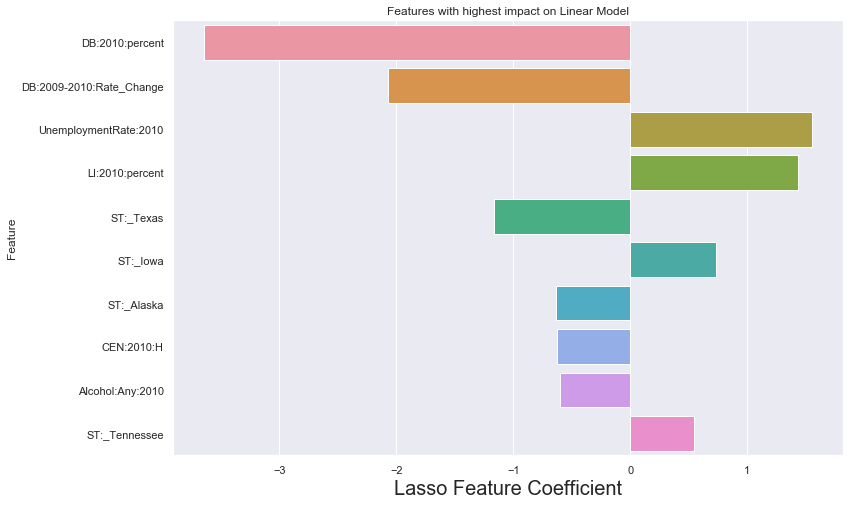

In [370]:
sns.set() 
sns.set_palette("RdBu")
plt.figure(figsize = (12, 8))
sns.barplot(x="coefficients", y="features", data=plt_coefs_df.iloc[:10])#hue=["red", "red", ]"color"
plt.xlabel("Lasso Feature Coefficient", size = 20)
#barlist[0].set_color('r')
plt.ylabel("Feature")
plt.title("Features with highest impact on Linear Model")


In [1158]:
plt_coefs_df.head(20)["features"]

0              DB:2010:percent
65    DB:2009-2010:Rate_Change
1        UnemploymentRate:2010
5              LI:2010:percent
52                   ST:_Texas
24                    ST:_Iowa
11                  ST:_Alaska
72                  CEN:2010:H
8             Alcohol:Any:2010
51               ST:_Tennessee
10                 ST:_Alabama
21                   ST:_Idaho
44                    ST:_Ohio
55                ST:_Virginia
15                ST:_Colorado
7           Rural_percent_2010
23                 ST:_Indiana
70                CEN:2010:AAC
49          ST:_South Carolina
59                 ST:_Wyoming
Name: features, dtype: object

## FINAL PLOT: LASSO TOP FEATURES

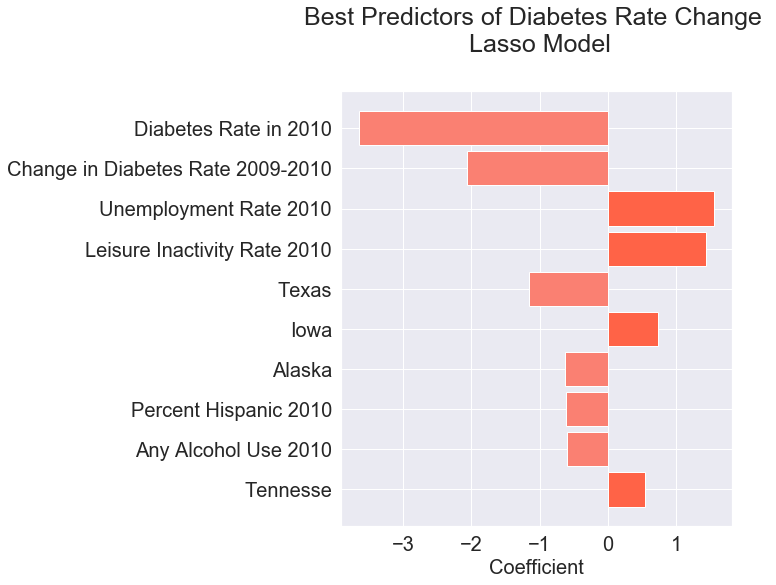

In [1164]:
plt.figure(figsize = (7, 8))   #was 12,8
plt.barh(plt_coefs_df["labels"].iloc[:10], height = .85, width = plt_coefs_df["coefficients"].iloc[:10],  
        color = plt_coefs_df["color"], align='center')
plt.xlabel("Coefficient", fontsize=20)
#plt.ylabel("Feature", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.title("Best Predictors of Diabetes Rate Change \n Lasso Model", fontsize=25, pad = 40)
#plt.tick_params(axis='both', which='major', labelsize=10)
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.gca().invert_yaxis()


#plt.yticklabels(plt_coefs_df["Features"])
plt.savefig('../images/lassotop10.png', bbox_inches="tight")


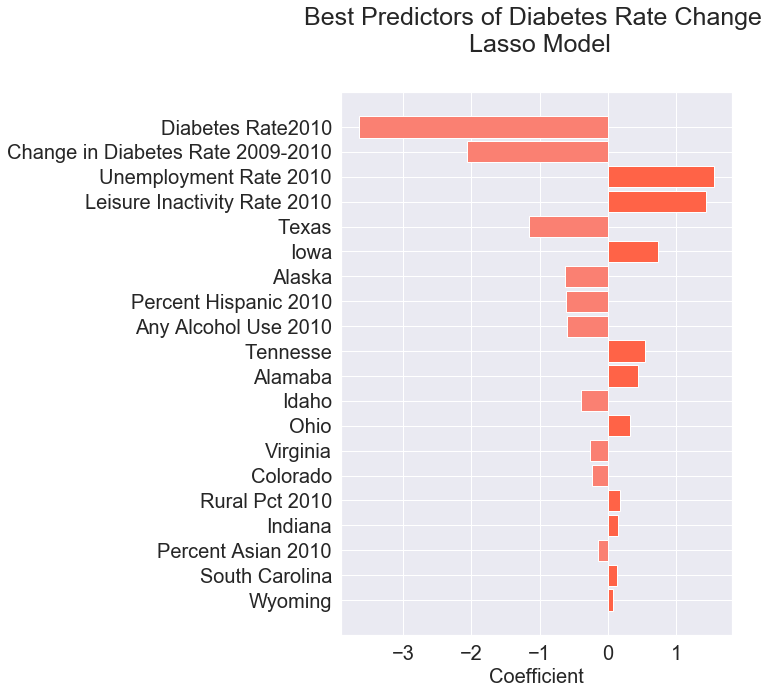

In [1167]:
plt.figure(figsize = (7, 10))   #was 12,8
plt.barh(plt_coefs_df["labels2"].iloc[:20], height = .85, width = plt_coefs_df["coefficients"].iloc[:20],  
        color = plt_coefs_df["color"], align='center')
plt.xlabel("Coefficient", fontsize=20)
#plt.ylabel("Feature", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.title("Best Predictors of Diabetes Rate Change \n Lasso Model", fontsize=25, pad = 40)
#plt.tick_params(axis='both', which='major', labelsize=10)
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.gca().invert_yaxis()


#plt.yticklabels(plt_coefs_df["Features"])
#plt.savefig('../images/lassotop10.png', bbox_inches="tight")


# PLOT LASSO PARTIAL DEPENDENCY

In [547]:
#Dependence Plot

#Made it so axis all the same!!

colnamemap = { "DB:2010:percent":"Diabetes Rate in 2010",
    "DB:2009-2010:Rate_Change":"Change in Diabetes Rate 2009-2010",
        "UnemploymentRate:2010": "Unemployment Rate 2010",
             "LI:2010:percent":"Leisure Inactivity Rate 2010",
                   "ST:_Texas":"Texas",
                    "ST:_Iowa":"Iowa",
                  "ST:_Alaska":"Alaska",
"CEN:2010:H":"Percent Hispanic 2010",
"Alcohol:Any:2010":"Any Alcohol Use 2010",
"ST:_Tennessee": "Tennesse"}
    
    
def pdp_same_axis_scale(model, col, num_breaks, ax, y_lim_min, y_lim_max):
    X_train_pdp = X_train.copy()
    
    #get x-axis values
    min_pdp = X_train[col].min()
    max_pdp = X_train[col].max()
    x = np.linspace(0, 100, num_breaks)
    x = x * ((max_pdp - min_pdp)/num_breaks)
    x = x + min_pdp
    
    #get y-axis values
    y = []
    for val in x:
        X_train_pdp[col] = val
        predictions = model.predict(scalar.transform(X_train_pdp))
        y.append(predictions.mean())

    #plot partial dependence
    ax.plot(x, y, linestyle='-', color = "tomato", linewidth=4.0)
    ax.set_xlabel(colnamemap[col], fontsize=20)
    ax.set_ylabel("Avg. Prediction for Diabetes Rate Change")
    ax.set_ylim(y_lim_min, y_lim_max)
    
    #formatting
    #ax.set_xticks(fontsize=14)
    #ax.set_yticks(fontsize=14)


In [550]:
top_10_lasso_feats = plt_coefs_df["features"].iloc[:5]
top_10_lasso_feats

0              DB:2010:percent
65    DB:2009-2010:Rate_Change
1        UnemploymentRate:2010
5              LI:2010:percent
52                   ST:_Texas
Name: features, dtype: object

In [530]:
scalar.inverse_transform

<bound method StandardScaler.inverse_transform of StandardScaler(copy=True, with_mean=True, with_std=True)>

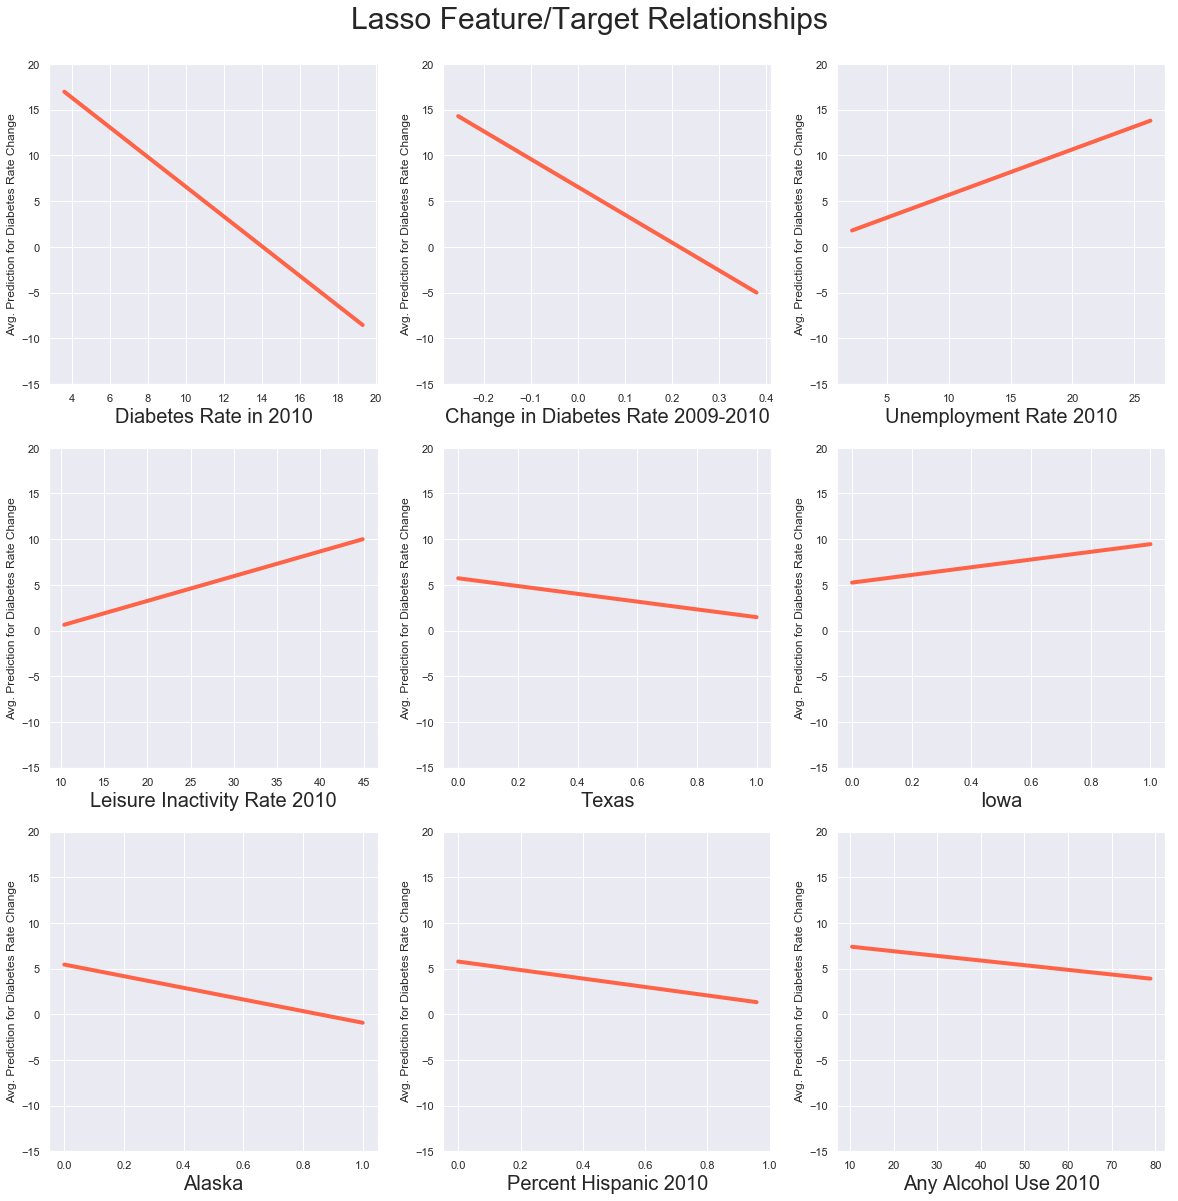

In [548]:
matplotlib.rcParams.update({'font.size': 16})


fig, axs = plt.subplots(3, 3, figsize=(20,20))
af = axs.flatten()
fig.suptitle("Lasso Feature/Target Relationships",  fontsize=30, y = .92)




for i, col in enumerate(top_10_lasso_feats):
    pdp_same_axis_scale(lassobest, col, 100, af[i], -15, 20)
    
fig.subplots_adjust(hspace=.2)

plt.savefig('../images/lassorelationships.png')


# PLOT RANDOM FOREST FEATURE IMPORTANCE

In [643]:
colnamemap = { "DB:2010:percent":"Diabetes Rate in 2010",
    "DB:2009-2010:Rate_Change":"Change in Diabetes Rate 2009-2010",
              "OB:2009-2010:Rate_Change" : "Change in Obesity Rate 2009-2010",
        "UnemploymentRate:2010": "Unemployment Rate 2010",
             "LI:2010:percent":"Leisure Inactivity Rate 2010",
    "LI:2009-2010:Rate_Change":"Change in Leisure Inactivity Rate 2009-2010",

              "OB:2010:percent" : "Obesity Prevalance 2010",
                   "ST:_Texas":"Texas",
                    "ST:_Iowa":"Iowa",
                  "ST:_Alaska":"Alaska",
"CEN:2010:H":"Percent Hispanic 2010",
"Alcohol:Any:2010":"Any Alcohol Use 2010",
              "Alcohol:Heavy:2010":"Heavy Alcohol Use 2010",
"ST:_Tennessee": "Tennesse", 
   "PCT_LACCESS_POP10" : "Low Access to groceries (%) 2010", 
        "FFRPTH09" :    "Fast Food per capita (2009)"  , 
     "Poverty_Rate_2010"    :    "Poverty Rate 2010" , 
          "Male_pct_2010" : "Male (%) 2010"  , 
              "CEN:2010:H" : "Hispanic (%) 2010",
            "Rural_percent_2010" : "Rural (%) 2010" , 
             "ST:_Alabama" : "Alabama", 
             "CEN:2010:NAC" : "Native Hawaiian / Pactific Islander (%) 2010"
             }




In [503]:
rfimpfeats = rfbest.feature_importances_

In [513]:
plt_impfeats_df = pd.DataFrame.from_dict({"features" : X_train.columns,
                             "feature_importance" : rfimpfeats })

In [523]:
plt_impfeats_df = plt_impfeats_df.reindex(plt_impfeats_df["feature_importance"].abs().sort_values().index)[::-1]


In [554]:
plt_impfeats_df.head()["features"]

65    DB:2009-2010:Rate_Change
0              DB:2010:percent
1        UnemploymentRate:2010
5              LI:2010:percent
8             Alcohol:Any:2010
Name: features, dtype: object

In [524]:
plt_impfeats_df["labels"] = plt_impfeats_df["features"].apply(lambda x: colnamemap[x] if x in colnamemap.keys() else x)

In [525]:
plt_impfeats_df.head(12)

,features,feature_importance,labels
65,DB:2009-2010:Rate_Change,0.136594,Change in Diabetes Rate 2009-2010
0,DB:2010:percent,0.101197,Diabetes Rate in 2010
1,UnemploymentRate:2010,0.051543,Unemployment Rate 2010
5,LI:2010:percent,0.048340,Leisure Inactivity Rate 2010
8,Alcohol:Any:2010,0.046546,Any Alcohol Use 2010
71,CEN:2010:NAC,0.038213,Native Hawaiian / Pactific Islander (%) 2010
66,OB:2009-2010:Rate_Change,0.037492,Change in Obesity Rate 2009-2010
64,Male_pct_2010,0.037327,Male (%) 2010
67,LI:2009-2010:Rate_Change,0.037016,Change in Leisure Inactivity Rate 2009-2010
72,CEN:2010:H,0.036282,Hispanic (%) 2010


In [526]:
plt_impfeats_df["features"][:10] 

65    DB:2009-2010:Rate_Change
0              DB:2010:percent
1        UnemploymentRate:2010
5              LI:2010:percent
8             Alcohol:Any:2010
71                CEN:2010:NAC
66    OB:2009-2010:Rate_Change
64               Male_pct_2010
67    LI:2009-2010:Rate_Change
72                  CEN:2010:H
Name: features, dtype: object

## FINAL PLOT: RANDOM FOREST TOP IMPORTANT FEATURES

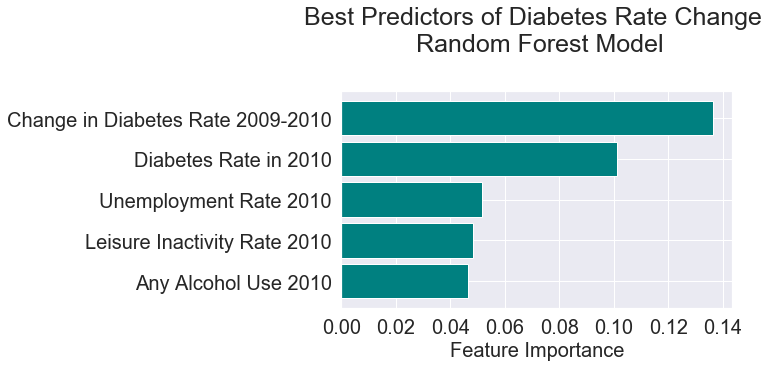

In [903]:
plt.figure(figsize = (7, 4))  #was 12, 8   9, 8 works too    #7, 8
plt.barh(plt_impfeats_df["labels"].iloc[:5], height = .85, width = plt_impfeats_df["feature_importance"].iloc[:5],  
        color = "teal", align='center')
plt.xlabel("Feature Importance", fontsize=20)
#plt.ylabel("Feature", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.title("Best Predictors of Diabetes Rate Change \n Random Forest Model", fontsize=25, pad = 40)
#plt.tick_params(axis='both', which='major', labelsize=10)
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.gca().invert_yaxis()


#plt.yticklabels(plt_coefs_df["Features"])
plt.savefig('../images/rftop10.png', bbox_inches="tight")


In [ ]:
#MAKING LONGER!!!!

plt.figure(figsize = (7, 4))  #was 12, 8   9, 8 works too    #7, 8
plt.barh(plt_impfeats_df["labels"].iloc[:5], height = .85, width = plt_impfeats_df["feature_importance"].iloc[:5],  
        color = "teal", align='center')
plt.xlabel("Feature Importance", fontsize=20)
#plt.ylabel("Feature", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.title("Best Predictors of Diabetes Rate Change \n Random Forest Model", fontsize=25, pad = 40)
#plt.tick_params(axis='both', which='major', labelsize=10)
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.gca().invert_yaxis()


#plt.yticklabels(plt_coefs_df["Features"])
plt.savefig('../images/rftop10.png', bbox_inches="tight")

# PLOT LASSO PARTIAL DEPENDENCY

In [544]:
#Dependence Plot

#Made it so axis all the same!!

#REMOVED SCALLIN!!!
    
def pdp_same_axis(model, col, num_breaks, ax, y_lim_min, y_lim_max):
    X_train_pdp = X_train.copy()
    
    #get x-axis values
    min_pdp = X_train[col].min()
    max_pdp = X_train[col].max()
    x = np.linspace(0, 100, num_breaks)
    x = x * ((max_pdp - min_pdp)/num_breaks)
    x = x + min_pdp
    
    #get y-axis values
    y = []
    for val in x:
        X_train_pdp[col] = val
        predictions = model.predict(X_train_pdp)
        y.append(predictions.mean())

    #plot partial dependence
    ax.plot(x, y, linestyle='-', color = "lightblue", linewidth=4.0)
    ax.set_xlabel(colnamemap[col], fontsize=20)
    ax.set_ylabel("Avg. Prediction for Diabetes Rate Change")
    ax.set_ylim(y_lim_min, y_lim_max)
    
    #formatting
    #ax.set_xticks(fontsize=14)
    #ax.set_yticks(fontsize=14)


In [532]:
top_9_rf_feats = plt_impfeats_df["features"].iloc[:9]
top_9_rf_feats

65    DB:2009-2010:Rate_Change
0              DB:2010:percent
1        UnemploymentRate:2010
5              LI:2010:percent
8             Alcohol:Any:2010
71                CEN:2010:NAC
66    OB:2009-2010:Rate_Change
64               Male_pct_2010
67    LI:2009-2010:Rate_Change
Name: features, dtype: object

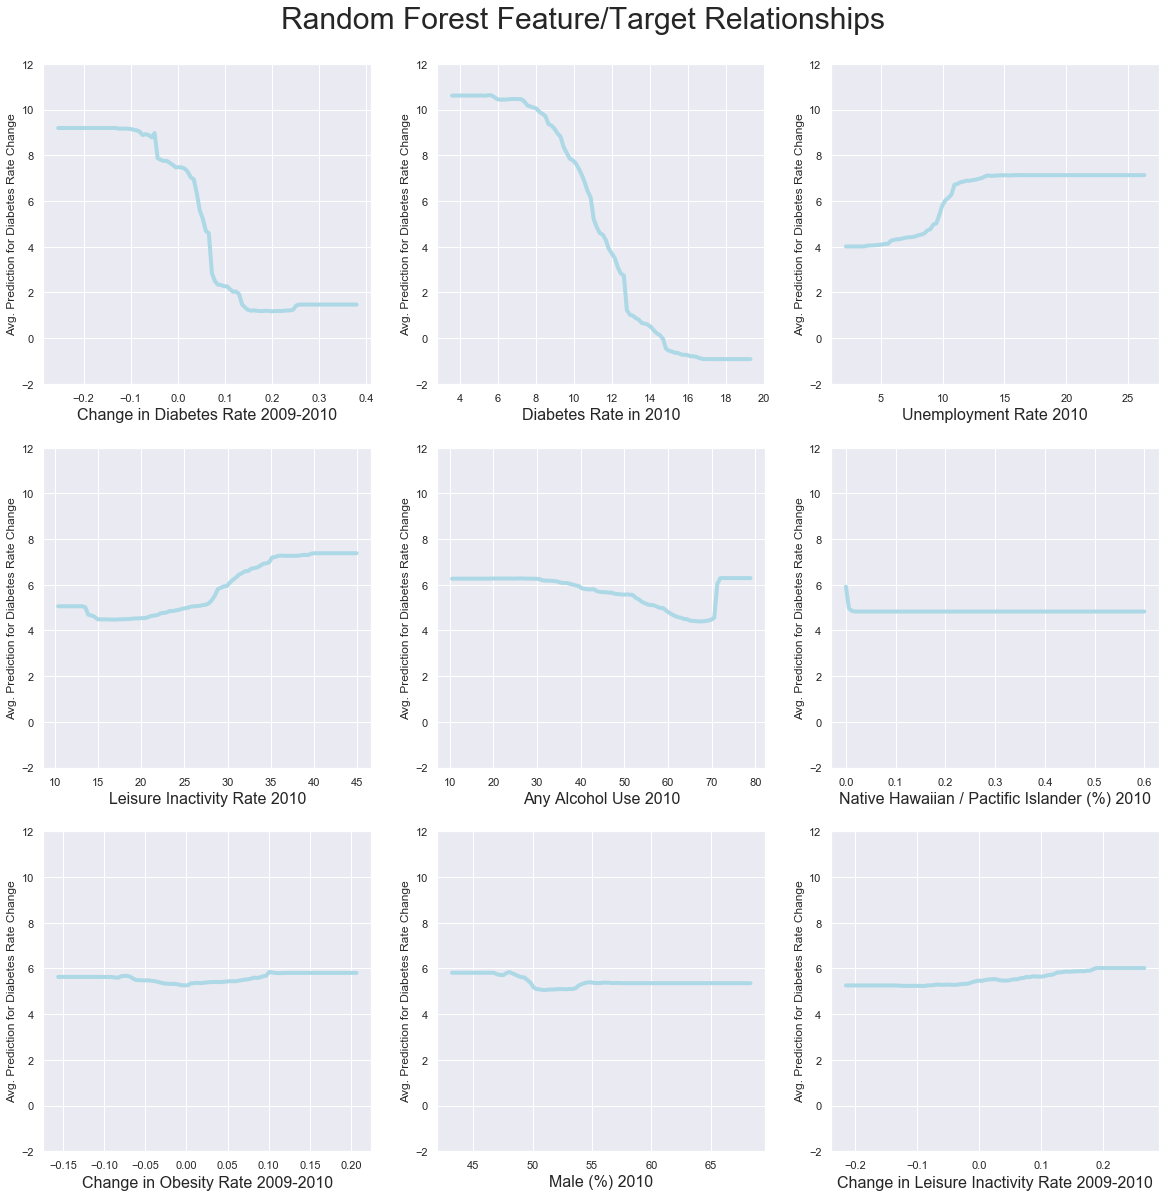

In [545]:
matplotlib.rcParams.update({'font.size': 16})


fig, axs = plt.subplots(3, 3, figsize=(20,20))
af = axs.flatten()
fig.suptitle("Random Forest Feature/Target Relationships",  fontsize=30, y = .92)


for i, col in enumerate(top_9_rf_feats):
    pdp_same_axis(rfbest, col, 100, af[i], -2, 12)
    
fig.subplots_adjust(hspace=.2)

plt.savefig('../images/rfrelationships.png')


# PLOT BOTH ON ONE AXIS!!!

In [915]:
top_5_both = ["DB:2009-2010:Rate_Change", "DB:2010:percent", "UnemploymentRate:2010", "LI:2010:percent",
              "Alcohol:Any:2010", "ST:_Texas", "ST:_Iowa",  "CEN:2010:H",  "OB:2009-2010:Rate_Change",                
              "ST:_Alaska"]
        

              

In [1215]:
def pdp_both_models(model_scale, model_not, col, num_breaks, ax, y_lim_min, y_lim_max, linewidth, color_scale = "tomato", color_not = "teal"):
    X_train_pdp = X_train.copy()
    
    #get x-axis values
    min_pdp = X_train[col].min()
#     if col == "CEN:2010:NAC":
#         max_pdp = .03
#     else:
    max_pdp = X_train[col].max()
    x = np.linspace(0, 100, num_breaks)
    x = x * ((max_pdp - min_pdp)/num_breaks)
    x = x + min_pdp
    
    #get yA-axis values
    y_not = []
    for val in x:
        X_train_pdp[col] = val
        predictions = model_not.predict(X_train_pdp)
        y_not.append(predictions.mean())

       #get y-axis values
    y_scale = []
    for val in x:
        X_train_pdp[col] = val
        predictions = model_scale.predict(scalar.transform(X_train_pdp))
        y_scale.append(predictions.mean())

        
    #plot partial dependence
    ax.plot(x, y_scale, linestyle='-', color = color_scale, linewidth=linewidth, label = "Lasso")
    ax.plot(x, y_not, linestyle='-', color = color_not, linewidth=linewidth, label = "RandomForest")

    ax.set_xlabel(colnamemap[col], fontsize=20)
    #ax.set_ylabel("Avg. Prediction for Diabetes Rate Change")
    ax.set_ylim(y_lim_min, y_lim_max)
    
    #formatting
    #ax.set_xticks(fontsize=14)
    #ax.set_yticks(fontsize=14)

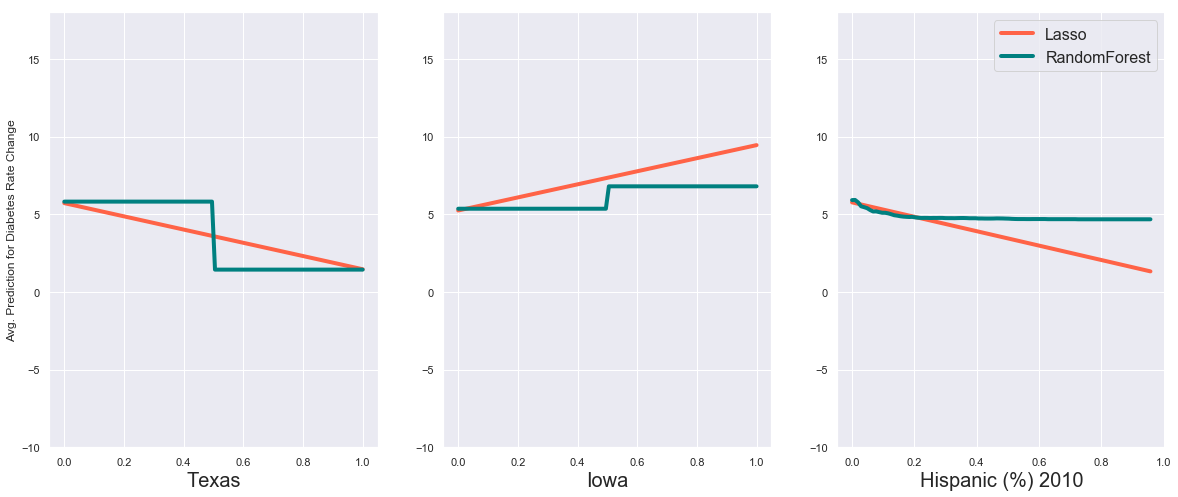

In [917]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))    #was 20, 8
af = axs.flatten()
#fig.suptitle("Feature/Target Relationships",  fontsize=30, y = .92)


for i, col in enumerate(top_5_both[5:8]):
    pdp_both_models(lassobest, rfbest, col, 100, af[i], -10, 18, linewidth=4.0)

af[0].set_ylabel("Avg. Prediction for Diabetes Rate Change")
    
fig.subplots_adjust(hspace=.2)

plt.legend(prop={'size': 16})

#plt.savefig('../images/compare_relationships.png')


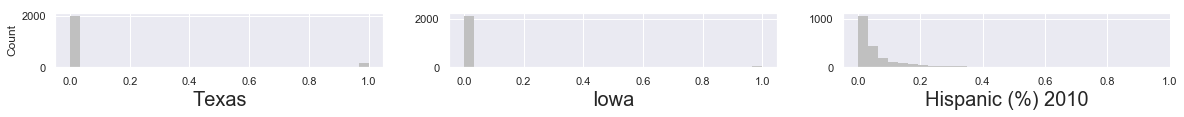

In [1187]:
fig, axs = plt.subplots(1, 3, figsize=(20,1))
af = axs.flatten()
#fig.suptitle("Feature/Target Relationships",  fontsize=30, y = .92)


for i, col in enumerate(top_5_both[5:8]):
#     if col == "CEN:2010:NAC":
#         af[i].hist(X_train["CEN:2010:NAC"].sort_values()[:-4], bins = 30, color = "#C0C0C0", edgecolor = "none") #background = "white")
#         af[i].set_xlim(-0.001, .03)
#     else:
    af[i].hist(X_train[col], bins = 30, color = "#C0C0C0", edgecolor = "none") #background = "white")
    af[i].set_xlabel(colnamemap[col], fontsize=20)



af[0].set_ylabel("Count")
    
fig.subplots_adjust(hspace=.2)

#plt.savefig('../images/compare_relationships.png')


## FOR ONE_SHEETER

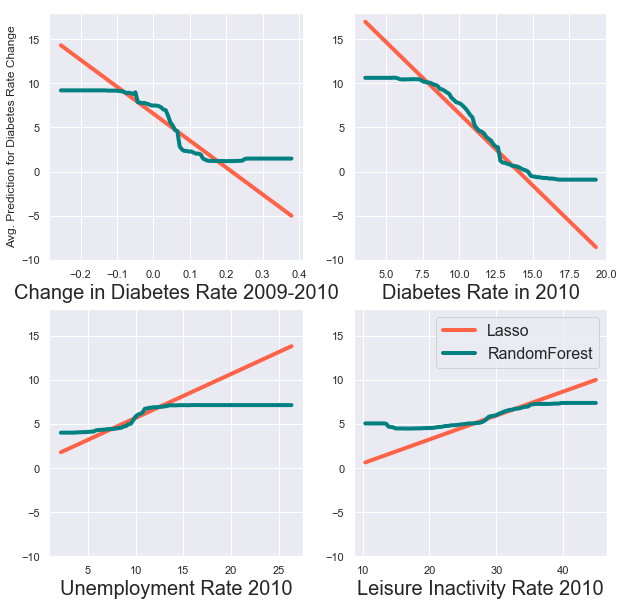

In [1175]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))    #was 20, 8
af = axs.flatten()
#fig.suptitle("Feature/Target Relationships",  fontsize=30, y = .92)


for i, col in enumerate(top_5_both[0:4]):
    pdp_both_models(lassobest, rfbest, col, 100, af[i], -10, 18, linewidth=4.0)

af[0].set_ylabel("Avg. Prediction for Diabetes Rate Change")
    
fig.subplots_adjust(hspace=.2)

plt.legend(prop={'size': 16})

#plt.savefig('../images/compare_relationships.png')

# COMBINES ALL GRPHIS

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))    #was 20, 8
af = axs.flatten()
#fig.suptitle("Feature/Target Relationships",  fontsize=30, y = .92)


for i, col in enumerate(top_5_both[0:4]):
    

af[0].set_ylabel("Avg. Prediction for Diabetes Rate Change")
    
fig.subplots_adjust(hspace=.2)

plt.legend(prop={'size': 16})

#plt.savefig('../images/compare_relationships.png')

In [ ]:
top_4 = ["DB:2010:percent", "DB:2009-2010:Rate_Change", "UnemploymentRate:2010", "LI:2010:percent"]
         

fig, ax = plt.subplots(1, 4, figsize = (22,6))
af = ax.flatten()
for i, col in enumerate(top_4):
    af[i].hexbin(x = X_train[col].values, y=y_train.values.reshape(-1,), gridsize=25, bins='log', cmap="bone")
    af[i].set_facecolor('xkcd:white')
    af[i].spines['bottom'].set_color('lightgray')
    af[i].spines['top'].set_color('lightgray')
    af[i].spines['left'].set_color('lightgray')
    af[i].spines['right'].set_color('lightgray')
    af[i].set_xlabel(colnamemap[col], fontsize = 20)
    pdp_both_models(lassobest, rfbest, col, 100, af[i], -35, 60, linewidth=7.0, color_scale = "coral", color_not = "turquoise")
    
af[0].set_ylabel("Diabetes Rate Change \n(2010-2013)", fontsize = 20)
#af[4].set_ylabel("Diabetes Rate Change \n(2010-2013)", fontsize = 20)

#plt.suptitle("Diabetes Rate Change vs. Top Predictors", fontsize = 35, y = 1.05)
plt.tight_layout()
plt.legend()

plt.subplots_adjust(wspace=.1, hspace=0)

In [1203]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

grycmp = grayscale_cmap("OrRd")

In [1213]:
plt.cm.get_cmap(grycmp)

# REGULARIZED SM MODELS STATS

In [ ]:
LASSO 

In [259]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [260]:
X_train_scaled_const = sm.add_constant(X_train_scaled)

In [271]:
modelsmlasso = sm.OLS(y_train,X_train_scaled_const)


In [278]:
results = modelsmlasso.fit_regularized() #alpha = .5, L1_wt = 1, method='elastic_net', maxiter = 1000

In [279]:
results.summary()

In [257]:
# lassobest = Lasso(alpha =  .5, max_iter = 1000)

OLS  #1 is lasso fit




TypeError: fit_regularized() missing 1 required positional argument: 'self'

In [283]:
model = sm.OLS(y_train, X_train_scaled_const)
results_fu = model.fit()

results_fr = model.fit_regularized(L1_wt=0, alpha=.5)


In [284]:
results_fr.params

array([ 3.58465880e+00, -2.35908181e+00,  8.49699329e-01, -2.90500802e-01,
       -1.47253237e-01,  4.02270535e-02,  4.49052502e-01, -1.23864322e-01,
        5.11056917e-01, -5.17047900e-01, -5.91683103e-02,  5.84967443e-01,
       -5.54722255e-01,  3.10550110e-01,  2.79851643e-01,  2.84127525e-01,
       -3.95219334e-01, -2.09344149e-01,  1.32161594e-01, -1.08653413e-01,
        4.20739207e-02, -3.18612756e-01, -5.90418673e-01,  3.75259464e-01,
        4.93449956e-01,  8.02235045e-01, -2.76638691e-01, -9.41459855e-02,
       -1.50111876e-01, -2.31768621e-01,  2.08903979e-02, -6.16470701e-02,
       -1.29691085e-01, -2.24044987e-01,  1.00069336e-01,  2.04765119e-01,
        1.43589115e-01, -1.99678965e-01, -2.37520962e-01,  1.78803384e-01,
       -5.70442587e-02,  2.77524626e-01, -3.53053229e-01, -1.57399101e-02,
       -6.44718913e-02,  6.01608999e-01,  3.14041451e-01,  3.60635415e-01,
        8.25621949e-02,  2.76068398e-01,  3.73106028e-01, -7.40951790e-02,
        7.57149567e-01, -

In [285]:
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)


In [290]:
model.normalized_cov_params[:3, :3]

array([[ 4.54752160e-04,  6.13251854e-19,  8.94731490e-19],
       [ 6.13251854e-19,  2.75003091e-03, -2.29361705e-04],
       [ 8.94731490e-19, -2.29361705e-04,  1.57853862e-03]])

In [286]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     7.911
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.71e-68
Time:                        16:20:52   Log-Likelihood:                -8291.0
No. Observations:                2199   AIC:                         1.673e+04
Df Residuals:                    2125   BIC:                         1.715e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5847      0.228     15.737      0.000       3.138       4.031
x1            -2.3591      0.560     -4.212      0.000      -3.458      -1.261
x2             0.8497      0.424      2.002      0.045       0.017       1.682
x3            -0.2905      0.271     -1.072      0.284      -0.822       0.241
x4            -0.1473      0.268     -0.549      0.583      -0.673       0.379
x5             0.0402      0.418      0.096      0.923      -0.780       0.861
x6             0.4491      0.533      0.843      0.399      -0.595       1.493
x7            -0.1239      0.495     -0.250      0.802      -1.094       0.846
x8             0.5111      0.379      1.349      0.178      -0.232       1.254
x9            -0.5170      0.798     -0.648      0.517      -2.082       1.048
x10           -0.0592      0.546     -0.108      0.914      -1.130       1.012
x11            0.5850      2.520      0.232      0.816      -4.357       5.527
x12           -0.5547      1.603     -0.346      0.729      -3.698       2.589
x13            0.3106      1.175      0.264      0.792      -1.993       2.614
x14            0.2799      2.664      0.105      0.916      -4.944       5.503
x15            0.2841      2.287      0.124      0.901      -4.201       4.769
x16           -0.3952      2.262     -0.175      0.861      -4.830       4.040
x17           -0.2093      0.733     -0.286      0.775      -1.647       1.228
x18            0.1322      0.646      0.205      0.838      -1.134       1.398
x19           -0.1087      0.422     -0.257      0.797      -0.936       0.719
x20            0.0421      2.353      0.018      0.986      -4.572       4.656
x21           -0.3186      3.546     -0.090      0.928      -7.274       6.636
x22           -0.5904      2.028     -0.291      0.771      -4.567       3.387
x23            0.3753      2.954      0.127      0.899      -5.417       6.168
x24            0.4934      2.869      0.172      0.863      -5.132       6.119
x25            0.8022      2.861      0.280      0.779      -4.808       6.412
x26           -0.2766      2.834     -0.098      0.922      -5.834       5.281
x27           -0.0941      3.093     -0.030      0.976      -6.160       5.972
x28           -0.1501      2.490     -0.060      0.952      -5.033       4.733
x29           -0.2318      1.281     -0.181      0.856      -2.744       2.281
x30            0.0209      1.532      0.014      0.989      -2.983       3.025
x31           -0.0616      1.010     -0.061      0.951      -2.043       1.920
x32           -0.1297      2.634     -0.049      0.961      -5.296       5.036
x33           -0.2240      2.645     -0.085      0.932      -5.411       4.963
x34            0.1001      2.486      0.040      0.968      -4.774       4.975
x35            0.2048      2.984      0.069      0.945      -5.647       6.056
x3

In [705]:
# IMPORT GRAPH OF ALL

In [706]:
ddr = pd.read_csv('../data/raw_data/Diagnosed_Diabetes_By_Year - Sheet2.csv')

In [732]:
ddr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 3 columns):
Year                53 non-null int64
Percentage          53 non-null float64
Number in 1000s,    53 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


In [731]:
ddf['Year'] = ddr['Year'].to_numeric()

In [ ]:
ddr['Year'] = ddr['Year'].astype(int)

In [773]:
ddr['Mill'] = ddr['Number in 1000s,'] / 1000

In [709]:
ddr = ddr[ddr.Percentage.isnull() == False]

In [944]:
ddr.iloc[45:]

,Year,Percentage,"Number in 1000s,",Mill
45,2009,6.9,20667.0,20.667
46,2010,7.0,21129.0,21.129
47,2011,6.8,20739.0,20.739
48,2012,7.0,21465.0,21.465
49,2013,7.2,22297.0,22.297
50,2014,7.0,21953.0,21.953
51,2015,7.4,23350.0,23.350
52,2016,7.3,23195.0,23.195


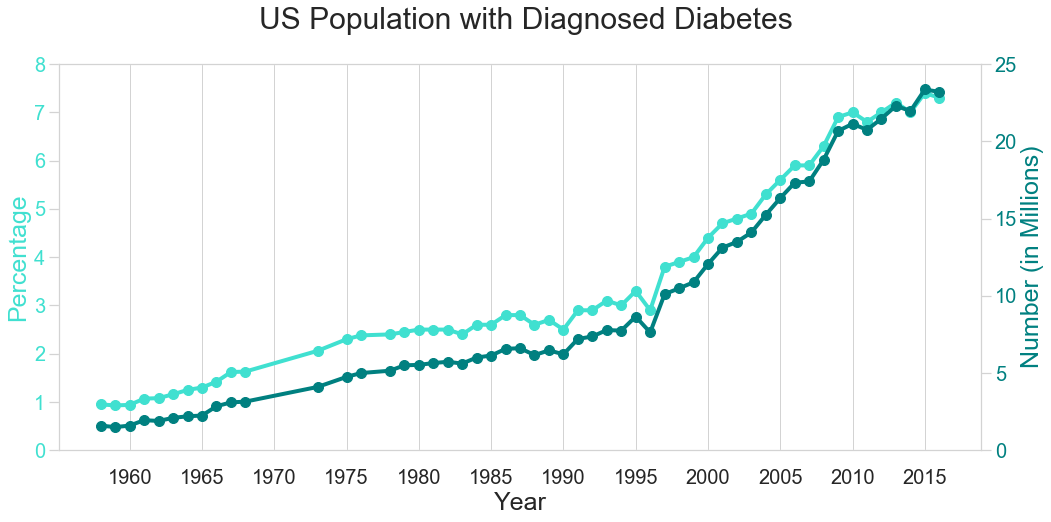

In [920]:
# plt.figure(figsize = (20, 10))
# plt.plot(ddr["Year"], ddr["Percentage"], linestyle='solid', linewidth=2.0, marker='o', markersize=8)
# plt.xticks(np.arange(1960, 2016, 5))

fig, ax1 = plt.subplots(figsize = (15, 7))


color = 'turquoise'  # turquoise #6D9EEB
ax1.set_xlabel('Year',  size=25, ) #labelsize = 20
ax1.set_xticks(np.arange(1960, 2016, 5))
ax1.tick_params(axis='x', size=15, labelsize = 20)
ax1.grid(axis='y', which='major') #, color = 'gray' 



ax1.set_ylabel('Percentage', color=color, size=25)
ax1.plot(ddr["Year"], ddr["Percentage"], linestyle='solid', linewidth=4.0, marker='o', markersize=10, color=color)
ax1.tick_params(axis='y', labelcolor=color, size=10, labelsize = 20, color = "lightgray")
ax1.set_yticks(np.arange(0, 8.5, 1))
ax1.set_facecolor('xkcd:white')



#ax.tick_params(axis='x', labelsize=30)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'teal'
ax2.set_ylabel('Number (in Millions)', color=color,  size=25)  # we already handled the x-label with ax1
ax2.plot(ddr["Year"], ddr["Mill"], linestyle='solid', linewidth=4.0, marker='o', markersize=10, color=color)
ax2.tick_params(axis='y', labelcolor=color, size=10, labelsize = 20,  color = "lightgray")
ax2.set_yticks(np.arange(0, 26, 5))
ax2.grid(False)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.suptitle("US Population with Diagnosed Diabetes", fontsize = 30, y = 1.05)

# sns.pointplot(x="Year", y="Percentage", data=ddr, ci="sd", label = "Percentage With Diabetes",  legend=False)
# plt.legend()

#     #ax.plot(x, y_scale, linestyle='-', color = "tomato", linewidth=4.0, label = "Lasso")

# sns.pointplot(x="Year", y="Number in 1000s,", data=ddr, ci="sd", label = "Number With Diabetes",  legend=False)

    

# ax = df.plot(x="date", y="column1", legend=False)
# ax2 = ax.twinx()
# df.plot(x="date", y="column2", ax=ax2, legend=False, color="r")
# ax.figure.legend()
# plt.show()


a = ax1.get_xgridlines()
for i in range(len(a)):
    b = a[i]
    b.set_color('lightgray')
    b.set_linewidth(1)
    
    
#plt.setp(ax1.spines.values(), color="lightgray")

ax2.spines['bottom'].set_color('lightgray')
ax2.spines['top'].set_color('lightgray')
ax2.spines['left'].set_color('lightgray')
ax2.spines['right'].set_color('lightgray')

    

ValueError: keyword fontsize is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms', 'grid_aa', 'grid_c', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

In [ ]:
ddr["Percentage"]

In [838]:
y_train.head(10)

,y_train
0,11.627907
1,-1.111111
2,0.000000
3,1.666667
4,27.500000
5,8.108108
6,10.852713
7,11.475410
8,14.814815
9,-1.369863


In [840]:
y_train.describe()

,y_train
count,2199.000000
mean,5.376988
std,11.844218
min,-28.971963
25%,-2.640293
50%,4.458599
75%,12.631579
max,57.407407


In [839]:
y_pred[:10]

array([ 7.94777024, -0.18463449,  5.44952025,  1.46769278,  2.33929988,
        7.84707647,  9.30094262,  7.89727358,  5.58442684,  7.0731442 ])

# BACK OF ENVELOPE MATH: PERCENT OF PEOPLE HELPED!

In [1002]:
alldata = pd.read_csv('../data/ALL_MERGED_DATA.csv')

In [1003]:
alldata.columns

Index(['State_master', 'FIPS_master', 'County_master', 'DB:2009:percent',
       'DB:2010:percent', 'TOT_POP', 'TOT_MALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'H_MALE', 'H_FEMALE',
       'AgeGrp01:0-4:2010', 'AgeGrp02:5-9:2010', 'AgeGrp03:10-14:2010',
       'AgeGrp04:15-19:2010', 'AgeGrp05:20-24:2010', 'AgeGrp06:25-29:2010',
       'AgeGrp07:30-34:2010', 'AgeGrp08:35-39:2010', 'AgeGrp09:40-44:2010',
       'AgeGrp10:45-49:2010', 'AgeGrp11:50-54:2010', 'AgeGrp12:55-59:2010',
       'AgeGrp13:60-64:2010', 'AgeGrp14:65-69:2010', 'AgeGrp15:70-74:2010',
       'AgeGrp16:75-79:2010', 'AgeGrp17:80-84:2010', 'AgeGrp18:85+:2010',
       'UnemploymentRate:2010', 'PCT_LACCESS_POP10', 'FFRPTH09',
       'Poverty_Rate_2010', 'LI:2009:percent', 'LI:2010:percent',
       'OB:2009:percent', 'OB:2010:percent', 'Rural_percent_2010',
       'Alcohol:Any:2010', 'Alcohol:Heavy:2010', 'Diabetes_pct_

In [1004]:
alldata.shape

(3142, 49)

In [1005]:
totpop = alldata['TOT_POP'].sum()
totpop

308739316.0

In [1006]:
alldata['num_diab_2010'] = alldata['TOT_POP']* alldata["DB:2010:percent"] / 100

In [1007]:
totdiab2010 = alldata['num_diab_2010'].sum()
totdiab2010

29302494.558

In [1008]:
totdiab2010 / totpop

0.09491014924059753

In [1009]:
alldata['DB:2013:percent']  = ((alldata['Diabetes_pct_growth_rate'] *  alldata["DB:2010:percent"]) / 100 )  + alldata["DB:2010:percent"]

In [1010]:
alldata['num_diab_2013'] = alldata['TOT_POP']* alldata['DB:2013:percent'] / 100
totdiab2013 = alldata['num_diab_2013'].sum()
totdiab2013

30704381.33

In [1011]:
alldata['EXTRA_DIAB'] = alldata['num_diab_2013'] - alldata['num_diab_2010']

In [1012]:
alldata['EXTRA_DIAB'].sum()

1401886.7720000003

In [1013]:
total_helped_if_5050 = alldata['EXTRA_DIAB'].sum() / 2
total_helped_if_5050

700943.3860000002

In [1014]:
alldata.columns

Index(['State_master', 'FIPS_master', 'County_master', 'DB:2009:percent',
       'DB:2010:percent', 'TOT_POP', 'TOT_MALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'H_MALE', 'H_FEMALE',
       'AgeGrp01:0-4:2010', 'AgeGrp02:5-9:2010', 'AgeGrp03:10-14:2010',
       'AgeGrp04:15-19:2010', 'AgeGrp05:20-24:2010', 'AgeGrp06:25-29:2010',
       'AgeGrp07:30-34:2010', 'AgeGrp08:35-39:2010', 'AgeGrp09:40-44:2010',
       'AgeGrp10:45-49:2010', 'AgeGrp11:50-54:2010', 'AgeGrp12:55-59:2010',
       'AgeGrp13:60-64:2010', 'AgeGrp14:65-69:2010', 'AgeGrp15:70-74:2010',
       'AgeGrp16:75-79:2010', 'AgeGrp17:80-84:2010', 'AgeGrp18:85+:2010',
       'UnemploymentRate:2010', 'PCT_LACCESS_POP10', 'FFRPTH09',
       'Poverty_Rate_2010', 'LI:2009:percent', 'LI:2010:percent',
       'OB:2009:percent', 'OB:2010:percent', 'Rural_percent_2010',
       'Alcohol:Any:2010', 'Alcohol:Heavy:2010', 'Diabetes_pct_

In [1015]:
xper = X_train.merge(y_train,  left_index=True, right_index=True)

In [1016]:
xpert = X_test.merge(y_test,  left_index=True, right_index=True)

In [1017]:
xpert.columns = list(xpert.columns[:-1]) + ["y_train"]

In [1018]:
xperf = pd.concat([xper, xpert])

In [1019]:
xperf.head()

,Age:0-14,Age:15-24,Age:25-44,Age:45+,Alcohol:Any:2010,Alcohol:Heavy:2010,CEN:2010:AAC,CEN:2010:BAC,CEN:2010:H,CEN:2010:IAC,...,ST:_Texas,ST:_Utah,ST:_Vermont,ST:_Virginia,ST:_Washington,ST:_West Virginia,ST:_Wisconsin,ST:_Wyoming,UnemploymentRate:2010,y_train
0,750.0,413.0,839.0,2536.0,60.5,11.7,0.003085,0.004407,0.026003,0.025342,...,0,0,0,0,0,0,0,0,6.9,11.627907
1,4091.0,6337.0,6540.0,7318.0,51.6,9.3,0.040682,0.256279,0.107346,0.016841,...,0,0,0,1,0,0,0,0,9.0,-1.111111
2,1911.0,1175.0,2267.0,5561.0,44.4,7.2,0.007788,0.027763,0.076874,0.018692,...,1,0,0,0,0,0,0,0,8.8,0.000000
3,20092.0,16145.0,25392.0,55009.0,54.5,6.6,0.008316,0.067422,0.010700,0.005341,...,0,0,0,0,0,0,0,0,9.5,1.666667
4,3154.0,1812.0,3719.0,7554.0,54.0,8.0,0.005789,0.007020,0.013178,0.014779,...,0,0,0,0,0,0,0,0,11.2,27.500000


In [1021]:
xperf["prediction"] = rfbest.predict(xperf.drop("y_train", axis = 1))

In [1022]:
xperf.head()

,Age:0-14,Age:15-24,Age:25-44,Age:45+,Alcohol:Any:2010,Alcohol:Heavy:2010,CEN:2010:AAC,CEN:2010:BAC,CEN:2010:H,CEN:2010:IAC,...,ST:_Utah,ST:_Vermont,ST:_Virginia,ST:_Washington,ST:_West Virginia,ST:_Wisconsin,ST:_Wyoming,UnemploymentRate:2010,y_train,prediction
0,750.0,413.0,839.0,2536.0,60.5,11.7,0.003085,0.004407,0.026003,0.025342,...,0,0,0,0,0,0,0,6.9,11.627907,1.613045
1,4091.0,6337.0,6540.0,7318.0,51.6,9.3,0.040682,0.256279,0.107346,0.016841,...,0,0,1,0,0,0,0,9.0,-1.111111,2.018670
2,1911.0,1175.0,2267.0,5561.0,44.4,7.2,0.007788,0.027763,0.076874,0.018692,...,0,0,0,0,0,0,0,8.8,0.000000,1.715123
3,20092.0,16145.0,25392.0,55009.0,54.5,6.6,0.008316,0.067422,0.010700,0.005341,...,0,0,0,0,0,0,0,9.5,1.666667,1.690890
4,3154.0,1812.0,3719.0,7554.0,54.0,8.0,0.005789,0.007020,0.013178,0.014779,...,0,0,0,0,0,0,0,11.2,27.500000,1.613045


In [1023]:
together = xperf.merge(alldata, right_on = ["UnemploymentRate:2010", "Diabetes_pct_growth_rate", "PCT_LACCESS_POP10"] ,
          left_on = ["UnemploymentRate:2010", "y_train", "PCT_LACCESS_POP10"] )

In [1024]:
together.head()

,Age:0-14,Age:15-24,Age:25-44,Age:45+,Alcohol:Any:2010_x,Alcohol:Heavy:2010_x,CEN:2010:AAC,CEN:2010:BAC,CEN:2010:H,CEN:2010:IAC,...,OB:2009:percent,OB:2010:percent_y,Rural_percent_2010_y,Alcohol:Any:2010_y,Alcohol:Heavy:2010_y,Diabetes_pct_growth_rate,num_diab_2010,DB:2013:percent,num_diab_2013,EXTRA_DIAB
0,750.0,413.0,839.0,2536.0,60.5,11.7,0.003085,0.004407,0.026003,0.025342,...,21.9,24.0,100.000000,60.5,11.7,11.627907,390.268,9.6,435.648,45.380
1,4091.0,6337.0,6540.0,7318.0,51.6,9.3,0.040682,0.256279,0.107346,0.016841,...,29.2,32.3,1.165280,51.6,9.3,-1.111111,2185.740,8.9,2161.454,-24.286
2,1911.0,1175.0,2267.0,5561.0,44.4,7.2,0.007788,0.027763,0.076874,0.018692,...,29.7,29.3,93.228880,44.4,7.2,0.000000,1287.852,11.8,1287.852,0.000
3,20092.0,16145.0,25392.0,55009.0,54.5,6.6,0.008316,0.067422,0.010700,0.005341,...,30.1,30.9,44.488932,54.5,6.6,1.666667,13996.560,12.2,14229.836,233.276
4,3154.0,1812.0,3719.0,7554.0,54.0,8.0,0.005789,0.007020,0.013178,0.014779,...,28.8,26.4,77.400086,54.0,8.0,27.500000,1299.120,10.2,1656.378,357.258


In [1025]:
numer_extra_diab_if_sort_by_pred = together.sort_values("y_train")["EXTRA_DIAB"][1568:].sum()
numer_extra_diab_if_sort_by_pred

1901365.116

In [1027]:
numer_extra_diab_if_sort_by_pred - total_helped_if_5050

1200421.7299999997

In [1028]:
1.2/7

0.17142857142857143

In [1032]:
together[["CEN:2010:H"]].describe()

,CEN:2010:H
count,3136.000000
mean,0.082981
std,0.132020
min,0.000000
25%,0.015941
50%,0.032861
75%,0.082404
max,0.957448


In [1052]:
together[(together["CEN:2010:H"] > .4)]["y_train"].mean()

1.3998889226233726

In [1053]:
together[(together["CEN:2010:H"] < .4)]["y_train"].mean()

5.589364349812259

In [1046]:
together.shape

(3136, 126)

In [1050]:
137/3136

0.04368622448979592

In [1034]:
X_train[["CEN:2010:H"]].sort_values("CEN:2010:H")

,CEN:2010:H
1382,0.000000
14,0.001906
60,0.002924
397,0.003420
1861,0.003516
1371,0.003537
518,0.003711
448,0.003719
1705,0.003736
1120,0.003942


# Scatterplots --> Diabetes Rate Increase with Each top 8

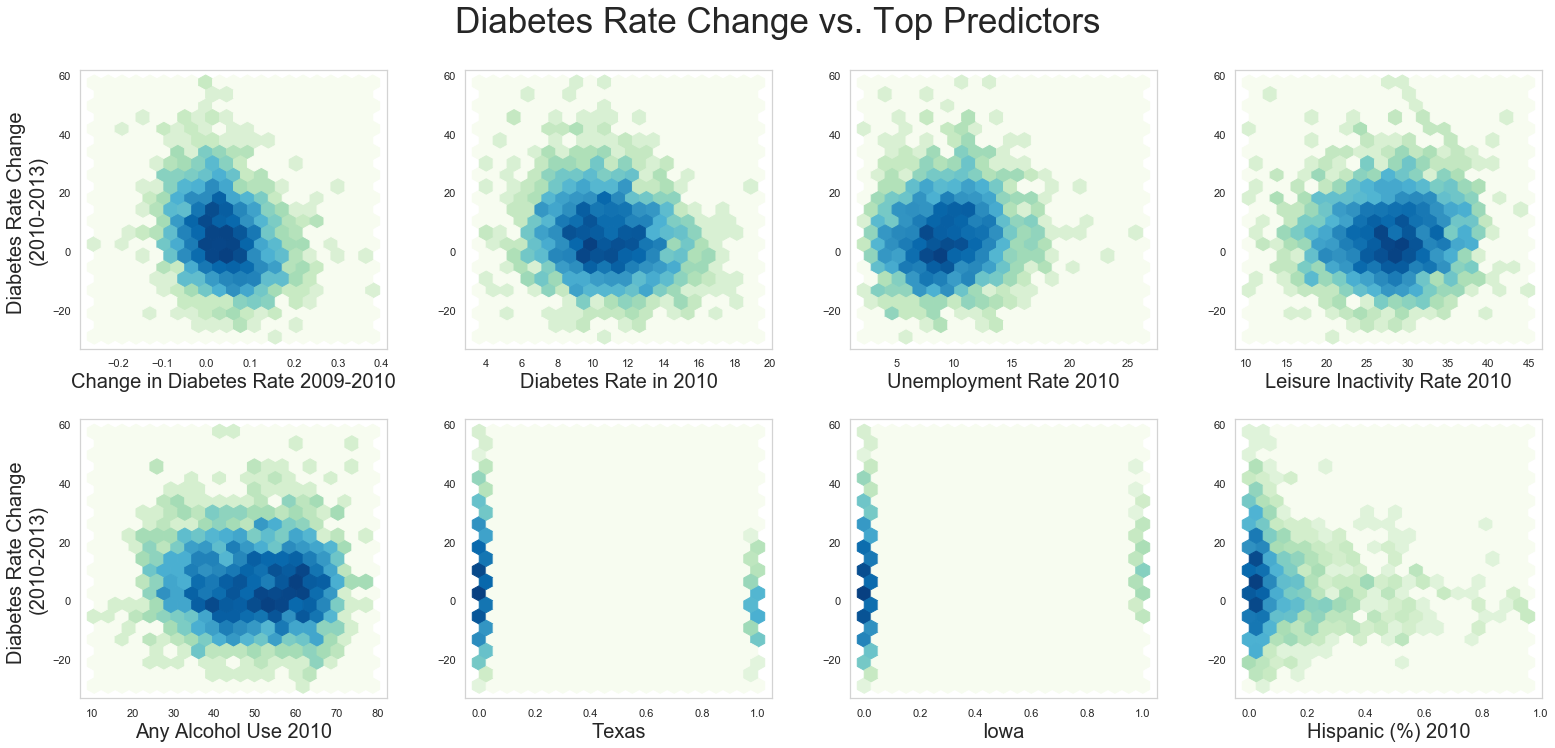

In [1111]:
top_5_both = ["DB:2009-2010:Rate_Change", "DB:2010:percent", "UnemploymentRate:2010", "LI:2010:percent",
              "Alcohol:Any:2010", "ST:_Texas", "ST:_Iowa",  "CEN:2010:H",  "OB:2009-2010:Rate_Change",                
              "ST:_Alaska"]
fig, ax = plt.subplots(2, 4, figsize = (22,10))
af = ax.flatten()
for i, col in enumerate(top_5_both[:8]):
    af[i].hexbin(x = X_train[col].values, y=y_train.values.reshape(-1,), gridsize=20, bins='log', cmap='GnBu')
    af[i].set_facecolor('xkcd:white')
    af[i].spines['bottom'].set_color('lightgray')
    af[i].spines['top'].set_color('lightgray')
    af[i].spines['left'].set_color('lightgray')
    af[i].spines['right'].set_color('lightgray')
    af[i].set_xlabel(colnamemap[col], fontsize = 20)
    
af[0].set_ylabel("Diabetes Rate Change \n(2010-2013)", fontsize = 20)
af[4].set_ylabel("Diabetes Rate Change \n(2010-2013)", fontsize = 20)

plt.suptitle("Diabetes Rate Change vs. Top Predictors", fontsize = 35, y = 1.05)
plt.tight_layout()

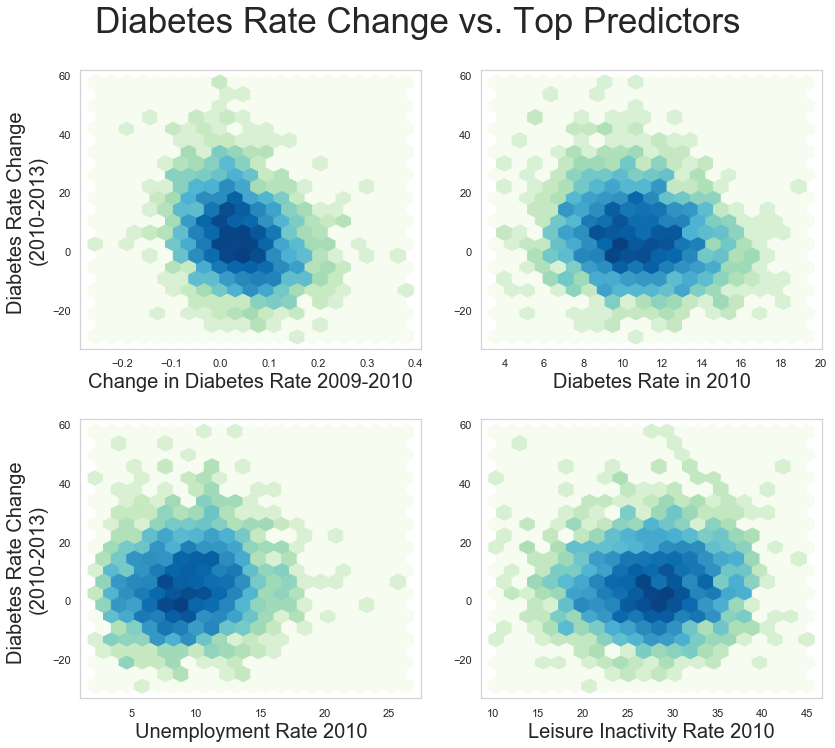

In [1174]:
top_5_both = ["DB:2009-2010:Rate_Change", "DB:2010:percent", "UnemploymentRate:2010", "LI:2010:percent",
              "Alcohol:Any:2010", "ST:_Texas", "ST:_Iowa",  "CEN:2010:H",  "OB:2009-2010:Rate_Change",                
              "ST:_Alaska"]
fig, ax = plt.subplots(2, 2, figsize = (12,10))
af = ax.flatten()
for i, col in enumerate(top_5_both[:4]):
    af[i].hexbin(x = X_train[col].values, y=y_train.values.reshape(-1,), gridsize=20, bins='log', cmap='GnBu')
    af[i].set_facecolor('xkcd:white')
    af[i].spines['bottom'].set_color('lightgray')
    af[i].spines['top'].set_color('lightgray')
    af[i].spines['left'].set_color('lightgray')
    af[i].spines['right'].set_color('lightgray')
    af[i].set_xlabel(colnamemap[col], fontsize = 20)
    
af[0].set_ylabel("Diabetes Rate Change \n(2010-2013)", fontsize = 20)
af[2].set_ylabel("Diabetes Rate Change \n(2010-2013)", fontsize = 20)

plt.suptitle("Diabetes Rate Change vs. Top Predictors", fontsize = 35, y = 1.05)
plt.tight_layout()

AttributeError: module 'matplotlib.pyplot' has no attribute 'facecolor'

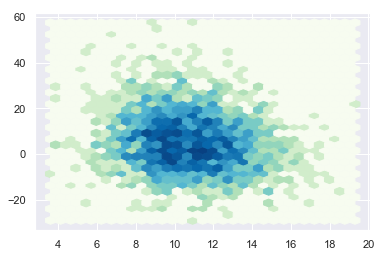

In [1090]:

plt.hexbin(x = X_train["DB:2010:percent"].values, y=y_train.values.reshape(-1,), gridsize=30, bins='log', cmap='GnBu')
ax1.set_facecolor('xkcd:white')

# ax2.spines['bottom'].set_color('lightgray')
# ax2.spines['top'].set_color('lightgray')
# ax2.spines['left'].set_color('lightgray')
# ax2.spines['right'].set_color('lightgray')

#X_train["DB:2010:percent"].values
#y_train.values.reshape(-1,)

In [ ]:
# Histogram of all training values!

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text yticklabel objects>)

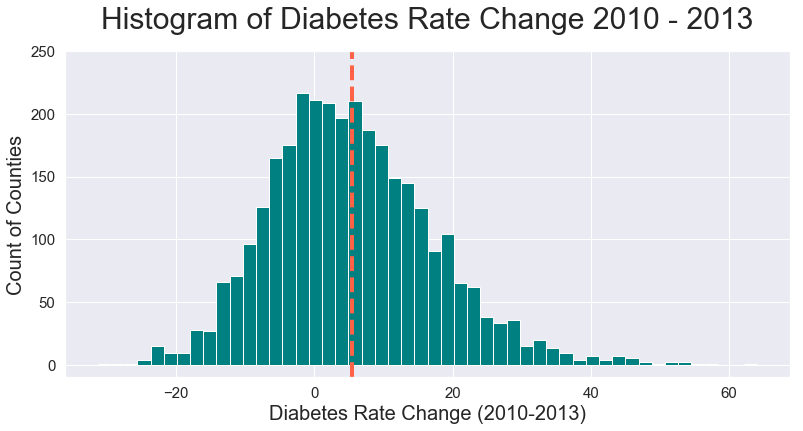

In [1135]:
plt.figure(figsize = (13, 6))
plt.hist(alldata['Diabetes_pct_growth_rate'], bins = 50, color = "teal") #edgecolor = "none") #background = "white")
plt.title("Histogram of Diabetes Rate Change 2010 - 2013", fontsize = 30, y = 1.05)
plt.axvline(5.381, linewidth = 4, linestyle = "--", color = "tomato")
plt.ylim(-10, 250)
plt.xlabel("Diabetes Rate Change (2010-2013)", fontsize = 20)
plt.ylabel("Count of Counties", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [1122]:
alldata['Diabetes_pct_growth_rate'].mean()

5.381684997923704